In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [42]:
full_lst=os.listdir("evaluation_errors")
log_error_lst=[]
noise_levels=[np.round(x, 2) for x in np.arange(0, 1.0, 1.0/20)]
noise_df=pd.DataFrame(columns=["exp", "synth"], index=noise_levels)

absolute_df=pd.DataFrame(columns=["values"], index=noise_levels)
data_lst=[]
for case in ["exp", "synth"]:
    for noise_level in noise_levels:
        log_error_lst=[]
        absolute_error_array_th=[]
        absolute_error_array_rh=[]
        absolute_error_array_sld=[]
        for filename in full_lst:
            noise_matches=re.findall(f".*\_({noise_level}).*_logerror_{case}.csv$", filename)
            if case=="exp":
                absolute_matches_th=re.findall(f".*\_({noise_level}).*\_th.csv$", filename)
                absolute_matches_rh=re.findall(f".*\_({noise_level}).*\_rh.csv$", filename)
                absolute_matches_sld=re.findall(f".*\_({noise_level}).*\_sld.csv$", filename)
                if absolute_matches_th:
                    absolute_error_array_th.append(np.loadtxt(f"evaluation_errors/{filename}"))
                if absolute_matches_rh:
                    absolute_error_array_rh.append(np.loadtxt(f"evaluation_errors/{filename}"))
                if absolute_matches_sld:
                    absolute_error_array_sld.append(np.loadtxt(f"evaluation_errors/{filename}"))
            if noise_matches:
                log_error_lst.append(np.loadtxt(f"evaluation_errors/{filename}"))
        noise_df.loc[noise_level, case]=log_error_lst
        if case=="exp":
            
            absolute_df.loc[noise_level, "values"]=[absolute_error_array_th, absolute_error_array_rh, absolute_error_array_sld]
        
absolute_df

,values
0.00,"[[[199.70184971389025, 295.52110370731174, 191..."
0.05,"[[[344.5075423014006, 457.5320162253793, 352.5..."
0.10,"[[[266.54145426187023, 237.83132902721383, 333..."
0.15,"[[[145.54801790299408, 205.27283399208176, 138..."
0.20,"[[[127.16783839362213, 74.11995076692097, 1.08..."
0.25,"[[[80.33640593640169, 41.68510504357078, 94.32..."
0.30,"[[[4.029418021349582, 107.97472680544797, 126...."
0.35,"[[[121.71773214699564, 228.6727492671256, 44.8..."
0.40,"[[[271.7077815341554, 377.6365860878885, 75.74..."
0.45,"[[[271.7077815341554, 377.6365860878885, 75.74..."


/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


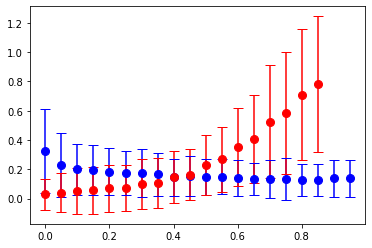

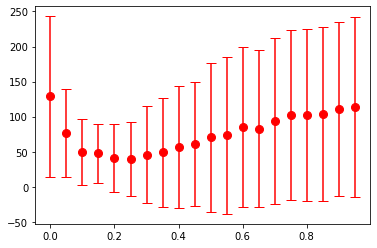

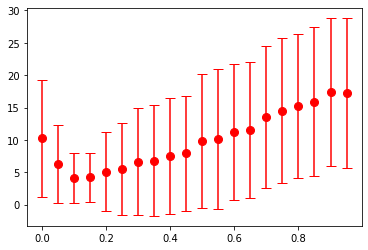

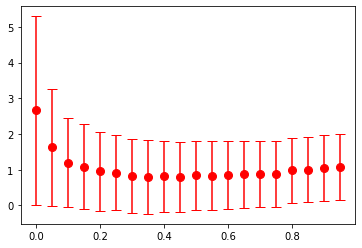

In [43]:
prev_value = 1
name = ""
fig, ax = plt.subplots(1)
for case, color in zip(["exp", "synth"], ["blue", "red"]):
    for noise_level in noise_levels:
        ax.errorbar(noise_level, np.mean(np.array(noise_df.loc[noise_level, case])), np.std(np.array(noise_df.loc[noise_level, case])), fmt='o', markersize=8, capsize=5, color=color)
for param_idx, param in enumerate(["th", "rh", "sld"]):
    fig, ax = plt.subplots(1)
    for noise_level in noise_levels:
        ax.errorbar(noise_level, np.mean(np.array(absolute_df.loc[noise_level, "values"][param_idx])), np.std(np.array(absolute_df.loc[noise_level, "values"][param_idx])), fmt='o', markersize=8, capsize=5, color=color)
# noise_dict
# for file in log_error_lst:
#     noise = re.findall("0\.\d", file)[-1]
#     print(noise)
#     data = pd.read_csv(f"evaluation_log_noise/{file}")
#     print(data)
#     data_mean = data.values.mean()
#     data_std = data.values.std()
#     print(data_std)
#     ax.errorbar(float(noise), data_mean, data_std,
#                 fmt='o', markersize=8, capsize=5)
